# Data Analysis

This data analysis is for: Toxic Comment Classification Challenge compeition in Kaggle

URL : https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge

Data files required can be downloaded from here: https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data

Download and save the data in ./data/ folder relative to this Jupyter notebook

## Numerical Analysis

1. Read ./data/train.csv file
2. Counts no. of training data per class
3. A single comment can belong to multiple class


In [1]:
import csv

# labels provided with the data set
toxic_labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# non_toxic is label for comments belonging to none of the toxic_labels
labels_count = {'toxic' : 0,
                'severe_toxic' : 0,
                'obscene' : 0,
                'threat' : 0,
                'insult' : 0,
                'identity_hate' : 0,
                'non_toxic' : 0}

# read the CSV file
with open('./data/train.csv') as train_file:
    reader = csv.DictReader(train_file)
    total_row = 0
    for row in reader:
        total_row += 1
        is_none = True
        for label in toxic_labels:
            if(row[label] == '1'):
                labels_count[label] += 1
                is_none = False
        if(is_none):
            labels_count['non_toxic'] += 1
    print(labels_count)
    print(total_row)

{'toxic': 15294, 'severe_toxic': 1595, 'obscene': 8449, 'threat': 478, 'insult': 7877, 'identity_hate': 1405, 'non_toxic': 143346}
159571


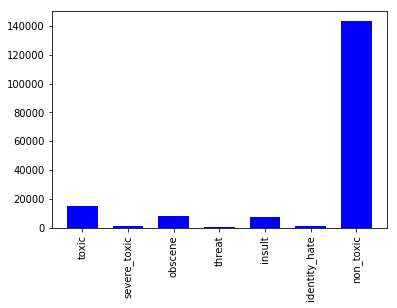

In [26]:
import matplotlib.pyplot as plt

plt.xticks(rotation=90)
plt.bar(labels_count.keys(), labels_count.values(), 1/1.5, color='b')
plt.show()

### Observations:
From above analysis we see that:
1. Total no. of data (training & validation) = 159,571
2. Total non-toxic comments = 143,346 (~ 89.83%)
3. Rest 10.17% of commets has one of the toxic label
4. Some of labels like threat, identity_hate, severe_toxic has very less samples compared to other labels

So this is imbalanced dataset as we can observe that data per class is highly imbalanced

## Language feature analysis

1. Understanding token (split comments into group of words) based features
2. Tokens histogram

In [3]:
texts = []
labels = []
toxic_labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
toxic_labels_id_map = {
    'non_toxic' : 0,
    'toxic' : 1,
    'severe_toxic' : 2,
    'obscene' : 3,
    'threat' : 4,
    'insult' : 5,
    'identity_hate' : 6
    }

num_rows_texts = 0
num_rows_labels = 0
with open('./data/train.csv') as train_file:
    reader = csv.DictReader(train_file)
    for row in reader:
        prev_row_count = num_rows_labels
        num_rows_texts += 1
        texts.append(row['comment_text'])
        is_none = True
        # check for labels other than toxic (1st label)
        for label in toxic_labels[1:]:
            if(row[label] == '1'):
                num_rows_labels += 1
                labels.append(toxic_labels_id_map[label])
                is_none = False
                break # a comments can have multiple labels but for now just take the 1st label <-- need to fix it
        if(is_none):
            num_rows_labels += 1
            # finally check if it is toxic or non-toxic
            if(row['toxic'] == '1'):
                labels.append(toxic_labels_id_map['toxic'])
            else:
                labels.append(toxic_labels_id_map['non_toxic'])
        if((num_rows_texts - num_rows_labels) < 0):
            print(row)
            break;

print(num_rows_texts)
print(num_rows_labels)

159571
159571


In [4]:
print('labels size:', len(labels))
labels[1:10]

labels size: 159571


[0, 0, 0, 0, 0, 2, 0, 0, 0]

# Tokenizing the data

Splitting the comments in to tokens, later used to create word vectors

In [5]:
from keras.preprocessing.text import Tokenizer

max_words = 10000 # consider only the tops 10,000 words in dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


Using TensorFlow backend.


Found 210337 unique tokens.


### Get histogram

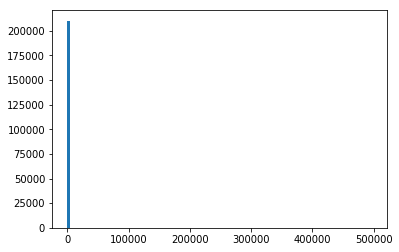

In [6]:
import numpy as np
#print(tokenizer.document_count)
# list of counts of words from map of word to its count
word_counts = list(tokenizer.word_counts.values())
#convert it to np array
word_counts_np = np.asarray(word_counts)
# create bin for histogram 
bins = np.arange(0, 300000, 100) # fixed bin size
#create history
plt.hist(word_counts_np, 100)
plt.show()

In [7]:
wc_np_s =  np.sort(word_counts_np)[::-1]

In [8]:
print(wc_np_s[1:100])

[297448 225041 224192 215749 206080 204397 176435 154532 145579 130323
 102949  97586  93754  89968  83463  77416  72225  72028  63365  59605
  58592  56039  54567  53405  51083  46268  45837  45619  44879  41511
  41435  40067  39545  37271  37203  36579  36420  34093  34073  31972
  31572  30715  30464  29780  29290  29244  28804  27994  27806  27318
  26811  25346  25126  24982  23700  23443  23238  22917  22586  22339
  21904  21596  21562  20624  20451  20071  19166  19108  18758  18261
  18242  17875  17873  17818  17723  17561  17545  17286  16750  16688
  16602  16205  15828  15606  15421  14936  14883  14732  14479  14327
  14310  13929  13898  13443  13389  12992  12777  12524  12426]
